# Perfect Matching Problem

Given a graph $G=(V,E)$, find a matching which matches all vertices of the graph.

(That is, every vertex of the graph is incident to exactly one edge of the matching)

## Variables:
$$
x_e = \begin{cases}
1 \text{ if edge $e$ is selected }\\
0 \text{ otherwise }
\end{cases}
$$

## Formulation:
\begin{eqnarray}
max && \sum_{e \in E} x_e\\
s.t.\\
\sum_{e \in E(i)} x_e = 1 , &&&& \forall i \in V\\
x_e \in {\{0,1\}}^{|E|}
\end{eqnarray}

In [101]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
G = nx.Graph()

In [103]:
G.add_nodes_from([1,2,3,4,5,6])

In [104]:
G.add_edges_from([(1,2),(1,5),(2,3),(2,5),(3,4),(3,6),(5,6)])

G:


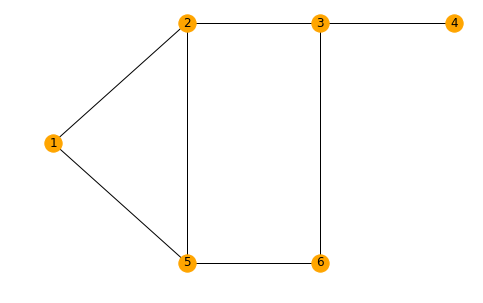

In [105]:
plt.figure(figsize=(8,5))
plt.axis('off')
pos = {1:(0,1),2:(1,2),3:(2,2),4:(3,2),5:(1,0),6:(2,0)}
node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_nodes(G,pos,G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("G:")

In [106]:
perfectmatching = gb.Model()

In [107]:
x = perfectmatching.addVars(G.edges(),vtype=gb.GRB.BINARY,name='x')

In [108]:
perfectmatching.setObjective(x.sum(),gb.GRB.MAXIMIZE)

In [109]:
for i in G.nodes():
    name = "node_%s" % (i)
    linexpr = gb.LinExpr()
    for j in G.adj[i]:
        if perfectmatching.getVarByName("x[%s,%s]" % (i,j)) is not None:
            linexpr+= x[i,j]
        else:
            linexpr+= x[j,i]
    perfectmatching.addConstr(linexpr == 1, name=name)

In [110]:
perfectmatching.update()

In [111]:
perfectmatching.write('perfectmatching.lp')

In [112]:
perfectmatching.optimize()

Optimize a model with 6 rows, 7 columns and 14 nonzeros
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


In [113]:
if perfectmatching.Status == gb.GRB.INFEASIBLE:
    print("Model is infeasible")
else:
    print("Obj:",perfectmatching.ObjVal,end='\n\n')
    for i in perfectmatching.getVars():
        print("%s = %g" % (i.VarName,i.x))

Obj: 3.0

x[1,2] = 1
x[1,5] = 0
x[2,3] = 0
x[2,5] = 0
x[3,4] = 1
x[3,6] = 0
x[5,6] = 1


sol G:


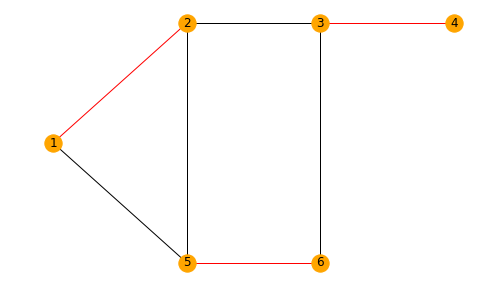

In [114]:
if perfectmatching.Status != gb.GRB.INFEASIBLE:
    plt.figure(figsize=(8,5))
    plt.axis('off')
    pos = {1:(0,1),2:(1,2),3:(2,2),4:(3,2),5:(1,0),6:(2,0)}
    node_labels = {i:i for i in G.nodes()}

    edge_colors = ['red' if i.x == 1 else 'black' for i in perfectmatching.getVars()]

    nx.draw_networkx_nodes(G,pos,G.nodes(),node_color='orange')
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors)
    nx.draw_networkx_labels(G,pos,labels=node_labels)

    print("sol G:")
    
else:
    print("Feasible solution not found")

### Example of an impossible perfect matching

In [115]:
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,2),(1,4),(2,3),(2,4),(3,5),(4,5)])

H:


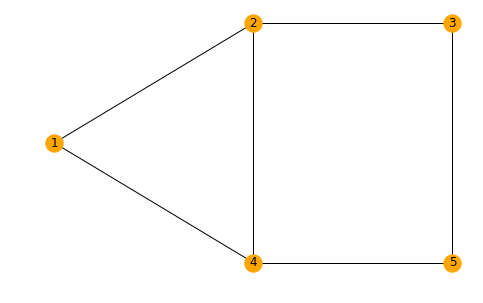

In [116]:
plt.figure(figsize=(8,5))
plt.axis('off')
pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0)}
node_labels = {i:i for i in H.nodes()}

nx.draw_networkx_nodes(H,pos,H.nodes(),node_color='orange')
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos,labels=node_labels)

print("H:")

In [117]:
impossibleperfectmatching = gb.Model()

In [118]:
x = impossibleperfectmatching.addVars(H.edges(),vtype=gb.GRB.BINARY,name='x')

In [119]:
impossibleperfectmatching.setObjective(x.sum(),gb.GRB.MAXIMIZE)

In [120]:
for i in H.nodes():
    name = "node_%s" % (i)
    linexpr = gb.LinExpr()
    for j in H.adj[i]:
        if impossibleperfectmatching.getVarByName("x[%s,%s]" % (i,j)) is not None:
            linexpr+= x[i,j]
        else:
            linexpr+= x[j,i]
    impossibleperfectmatching.addConstr(linexpr == 1, name=name)

In [121]:
impossibleperfectmatching.update()

In [122]:
impossibleperfectmatching.write('impossibleperfectmatching.lp')

In [123]:
impossibleperfectmatching.optimize()

Optimize a model with 5 rows, 6 columns and 12 nonzeros
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


In [124]:
if impossibleperfectmatching.Status == gb.GRB.INFEASIBLE:
    print("Model is infeasible")
else:
    print("Obj:",impossibleperfectmatching.ObjVal,end='\n\n')
    for i in impossibleperfectmatching.getVars():
        print("%s = %g" % (i.VarName,i.x))

Model is infeasible


In [125]:
if impossibleperfectmatching.Status != gb.GRB.INFEASIBLE:
    plt.figure(figsize=(8,5))
    plt.axis('off')
    pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0)}
    node_labels = {i:i for i in G.nodes()}

    edge_colors = ['red' if i.x == 1 else 'black' for i in impossibleperfectmatching.getVars()]

    nx.draw_networkx_nodes(H,pos,H.nodes(),node_color='orange')
    nx.draw_networkx_edges(H,pos,edge_color=edge_colors)
    nx.draw_networkx_labels(H,pos,labels=node_labels)

    print("sol H:")

else:
    print("Feasible solution not found")

Feasible solution not found
